# Create new features

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/auto_mpg.csv",
                 header=0,
                 names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower','Weight',\
                          'Acceleration', 'Model Year', 'Origin'])

df.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,India
1,15.0,8,350.0,165.0,3693.0,11.5,70,India
2,18.0,8,318.0,150.0,3436.0,11.0,70,India
3,16.0,8,304.0,150.0,3433.0,12.0,70,India
4,17.0,8,302.0,140.0,3449.0,10.5,70,India
5,15.0,8,429.0,198.0,4341.0,10.0,70,India
6,14.0,8,454.0,220.0,4354.0,9.0,70,India
7,14.0,8,440.0,215.0,4312.0,8.5,70,India
8,14.0,8,455.0,225.0,4425.0,10.0,70,India
9,15.0,8,390.0,190.0,3850.0,8.5,70,India


## Initial exploration of data

In [3]:
df.shape

(398, 8)

In [4]:
list(df.columns)

['MPG',
 'Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model Year',
 'Origin']

In [5]:
df.index

RangeIndex(start=0, stop=398, step=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 25.0+ KB


## Summary Statistics and Distribution

In [7]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [8]:
df.describe(include='object')

,Origin
count,398
unique,3
top,India
freq,249


In [9]:
df['Origin'].value_counts()

India      249
Germany     79
USA         70
Name: Origin, dtype: int64

<AxesSubplot:>

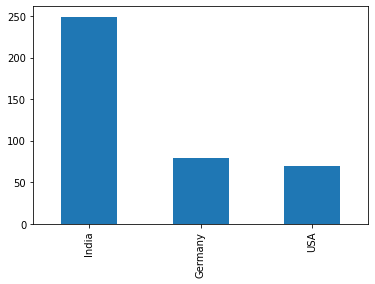

In [10]:
df['Origin'].value_counts().plot(kind='bar')

## Create new features from existing ones

In [11]:
df['displacement_on_power'] = df['Displacement'] / df['Horsepower']
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,displacement_on_power
0,18.0,8,307.0,130.0,3504.0,12.0,70,India,2.361538
1,15.0,8,350.0,165.0,3693.0,11.5,70,India,2.121212
2,18.0,8,318.0,150.0,3436.0,11.0,70,India,2.120000
3,16.0,8,304.0,150.0,3433.0,12.0,70,India,2.026667
4,17.0,8,302.0,140.0,3449.0,10.5,70,India,2.157143
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,India,1.627907
394,44.0,4,97.0,52.0,2130.0,24.6,82,USA,1.865385
395,32.0,4,135.0,84.0,2295.0,11.6,82,India,1.607143
396,28.0,4,120.0,79.0,2625.0,18.6,82,India,1.518987


In [13]:
df['weight_per_cylinder'] = df['Weight'] / df['Cylinders']
df['acc_per_cyl'] = df['Acceleration'] / df['Cylinders']
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,displacement_on_power,weight_per_cylinder,acc_per_cyl
0,18.0,8,307.0,130.0,3504.0,12.0,70,India,2.361538,438.000,1.5000
1,15.0,8,350.0,165.0,3693.0,11.5,70,India,2.121212,461.625,1.4375
2,18.0,8,318.0,150.0,3436.0,11.0,70,India,2.120000,429.500,1.3750
3,16.0,8,304.0,150.0,3433.0,12.0,70,India,2.026667,429.125,1.5000
4,17.0,8,302.0,140.0,3449.0,10.5,70,India,2.157143,431.125,1.3125
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,India,1.627907,697.500,3.9000
394,44.0,4,97.0,52.0,2130.0,24.6,82,USA,1.865385,532.500,6.1500
395,32.0,4,135.0,84.0,2295.0,11.6,82,India,1.607143,573.750,2.9000
396,28.0,4,120.0,79.0,2625.0,18.6,82,India,1.518987,656.250,4.6500
